In [1]:
import matplotlib.pyplot as plt
from skimage import io
import os
import numpy as np
from skimage.color import rgb2gray
from gtts import gTTS

def hardLim(n):
    a=[]
    for i in range(len(n)):
        if (n[i] > 0):
            a.append(1)
        else:
            a.append(0)
    return a

abecedario=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','Ñ','O',
            'P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e',
            'f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u',
            'v','w','x','y','z','á','é','í','ñ','ó','ú']

ruta_carpeta='D:/01 Escuela/01 UPIITA/Semestre 2023-1/IA/Letras1'
carpeta = os.scandir(ruta_carpeta)
tamañox=0
tamañoy=0

for imagen in carpeta:
    ruta=ruta_carpeta+'/'+imagen.name
    image = io.imread(ruta)
    if tamañox<=image.shape[0]:
        tamañox=image.shape[0]
    if tamañoy<=image.shape[1]:
        tamañoy=image.shape[1]    
#Obtención de w y b
a=0
w=[]
b=[]
for i in range(59):
    ruta=ruta_carpeta+'/'+str(i)+'.png'
    #print(ruta)
    image = io.imread(ruta)
    img=np.zeros([tamañox,tamañoy])
    img[0:image.shape[0],0:image.shape[1]]=image/255
    #image = Image.open(ruta)
    #image1=np.array(image.resize((tamañox, tamañoy)))/255
    #image1 = resize(image, (tamañox,tamañoy),anti_aliasing=True)*255
    w.append(img.flatten())     
    b.append(np.linalg.norm(np.array(img.flatten()))**2)
    #io.imsave(out_path+str(i)+'.png',img)
w=np.array(w)

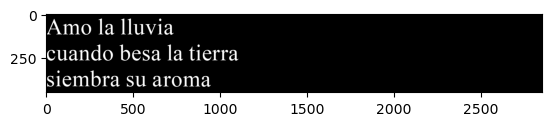

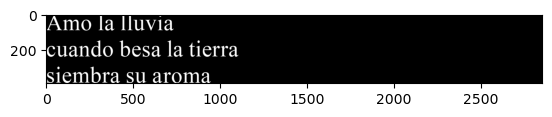

In [2]:
image = io.imread('D:/01 Escuela/01 UPIITA/Semestre 2023-1/IA/poema.png')
image=np.abs(rgb2gray(image[:,:,0:3])-1)
plt.figure()
plt.imshow(image,cmap='gray')

liminf=image.shape[0]
limsup=image.shape[0]
cont=0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        k=image.shape[0]-i-1
        if image[i,j]!=0 and liminf>i:
                liminf=i
        if image[k,j]!=0 and limsup>k and cont==0:
                limsup=k
                cont=1
                break
            
letras=image[liminf-1:limsup,:]
plt.figure()
plt.imshow(letras,cmap='gray')

inicio1=[]
fin1=[]
for i in range(letras.shape[0]-1):
    for j in range(letras.shape[1]):
        if letras[i,j]!=0 and np.all(letras[i-1,:]==0) and np.any(letras[i+1,:]!=0):
           inicio1.append(i)
           break
        if np.any(letras[i-1,:]!=0) and letras[i,j]!=0 and np.all(letras[i+1,:]== 0):
           fin1.append(i)
           break
if len(inicio1)>len(fin1):
    fin1.append(i+1)
elif len(inicio1)<len(fin1):
    fin1=fin1[0:len(inicio1)]
    



In [3]:
oraciones=''
for renglon in range(len(inicio1)):
    inicio=[]
    fin=[]
    letra1=letras[inicio1[renglon]-1:fin1[renglon]+1,:]
    liminf=letras.shape[1]
    limsup=letras.shape[1]
    for j in range(letra1.shape[1]-1):
        for i in range(letra1.shape[0]):
            if letra1[i,j]!=0 and np.all(letra1[:,j-1]==0) and np.any(letra1[:,j+1]!=0):
               inicio.append(j)
               break
            if np.any(letra1[:,j-1]!=0) and letra1[i,j]!=0 and np.all(letra1[:,j+1]== 0):
               fin.append(j)
               break
    oracion=''
    contador=0
    for a in range(len(inicio)):
        cont1=0
        letra=letra1[:,inicio[a]:fin[a]]
        for i in range(letra.shape[0]):
            for j in range(letra.shape[1]):
                k=image.shape[0]-i-1
                if letra[i,j]!=0 and np.all(letra[i-1,:]==0) and np.any(letra[i+1,:]!=0) and  cont1==0:
                    liminf=i
                    cont1=1
                if i>=letra.shape[0]-1:
                    if np.any(letra[i-1,j]!=0) and letra[i,j]!=0:
                        limsup=i
                else: 
                    if np.any(letra[i-1,j]!=0) and letra[i,j]!=0 and np.all(letra[i+1,:]== 0):
                        limsup=i
        letra=letra[liminf:limsup,:]
        p=np.zeros([tamañox,tamañoy])
        p[0:letra.shape[0],0:letra.shape[1]]=letra
        #p = resize(letra, (tamañox,tamañoy),anti_aliasing=True)*255
        p=p.flatten()
        b=np.array(b)
        salida=np.dot(w,p)-0.8*b
        salida[salida!=max(salida)]=0
        salida1=hardLim(salida)
        if contador>0:

            if (inicio[contador]-fin[contador-1])>=30:
                oracion=oracion+' '
        contador=contador+1
        try:
             oracion=oracion+abecedario[salida1.index(1)]
        except:
             oracion=oracion+' '
        #plt.figure()
        #plt.imshow(letra,cmap='gray')

    print(oracion)
    oraciones=oraciones+' '+oracion
    

Amo la lluvia
cuando besa la tierra
siembra su aroma


In [4]:
mytext = oraciones
  
language = 'es'
  
myobj = gTTS(text=mytext, lang=language, slow=False)
#audio = 'D:/01 Escuela/01 UPIITA/Semestre 2023-1/IA/poema.mp3'
audio='poema.mp3'
myobj.save(audio)
  
# Playing the converted file
os.system('poema.mp3')


0